### Sample calculations from PHYS 211 entropy lab

In [1]:
#from sympy.utilities.iterables import partitions
#from sympy import binomial
import numpy as np
from scipy.special import binom

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def omega(q,n):
    '''Multiplicity of states of Einstein solid with n atoms and q units of energy'''
    return binom(q+n-1,q)

#### Define system parameters

In [4]:
n_A = 100
n_B = 400
n_total = n_A + n_B
q_total = 400

#### Calculate multiplicities and entropies

In [10]:
q = np.linspace(0, q_total,q_total + 1)
omega_A = omega(q,n_A)
omega_B = omega(q,n_B)
s_A = np.log(omega_A)
s_B = np.log(omega_B)

<IPython.core.display.Javascript object>


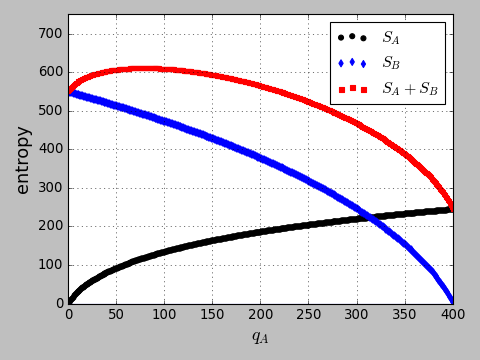

In [11]:
plt.figure()
x = np.linspace(0, q_total, q_total+1)
# xB = energy_total - xD
yB = np.flip(s_B)
yA = s_A
plt.xlim(0,q_total)
plt.ylim(0,750)
plt.scatter(x , yA, label='$S_A$', marker='o', color='black')
plt.scatter(x, yB, label='$S_B$', marker='d', color='blue')
plt.scatter(x, yA+yB, label='$S_A+ S_B}$', marker='s', color='r')
plt.xlabel('$q_A$')
plt.ylabel('entropy')
plt.legend(loc='upper right')
plt.grid()
plt.axhline(0);

#### Calculate temperatures 

\begin{eqnarray*}
\frac{1}{T_i} &=& \left.\frac{dS}{dq}\right\vert_i \\
            &\simeq& \frac{S_{i+1} - S_{i-1}}{2\epsilon}
\end{eqnarray*}
Solving for $T_i$ gives
$$
T_i \simeq \frac{2\epsilon}{S_{i+1} - S_{i-1}}.
$$

In [12]:
t_A = 2/(s_A[3:len(s_A)] - s_A[1:len(s_A)-2])
t_B = 2/(s_B[3:len(s_B)] - s_B[1:len(s_B)-2])

<IPython.core.display.Javascript object>


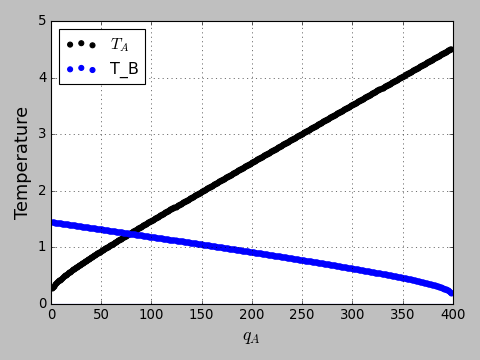

In [13]:
plt.figure()
x = np.linspace(1,q_total-2,q_total-2)
plt.scatter(x, t_A, color='black',label='$T_A$')
plt.scatter(x, np.flip(t_B), color='blue', label='T_B')
plt.xlim(0,q_total)
plt.ylim(0,5)
plt.grid()
plt.axhline(0)
plt.xlabel('$q_A$')
plt.ylabel('Temperature')
plt.legend(loc='best');

#### Version information
`version_information` is from J.R. Johansson (`jrjohansson at gmail.com`); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

In [15]:
%load_ext version_information

In [16]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Sun Dec 06 19:43:43 2020 EST